# Import libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df = pd.read_csv('./dataset/Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Exploring the dataset

In [5]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

No missing data

<AxesSubplot: >

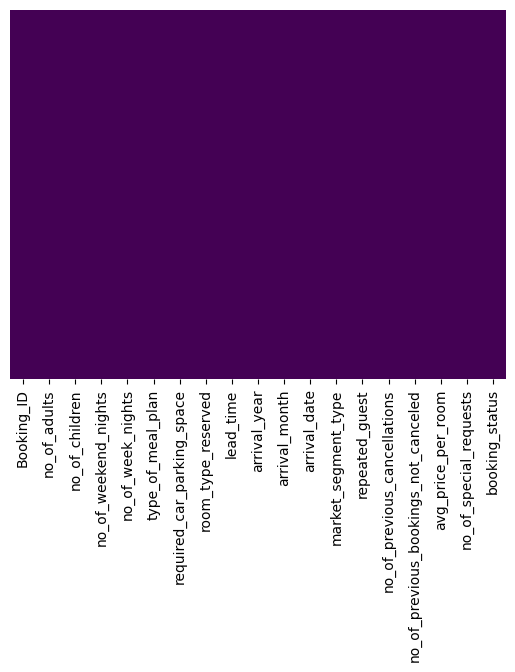

In [3]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

/var/folders/9t/m2f_d1vj02q9yd82g99yhmrr0000gn/T/ipykernel_11048/2273705633.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()>0.5, annot=False, cmap='viridis')


<AxesSubplot: >

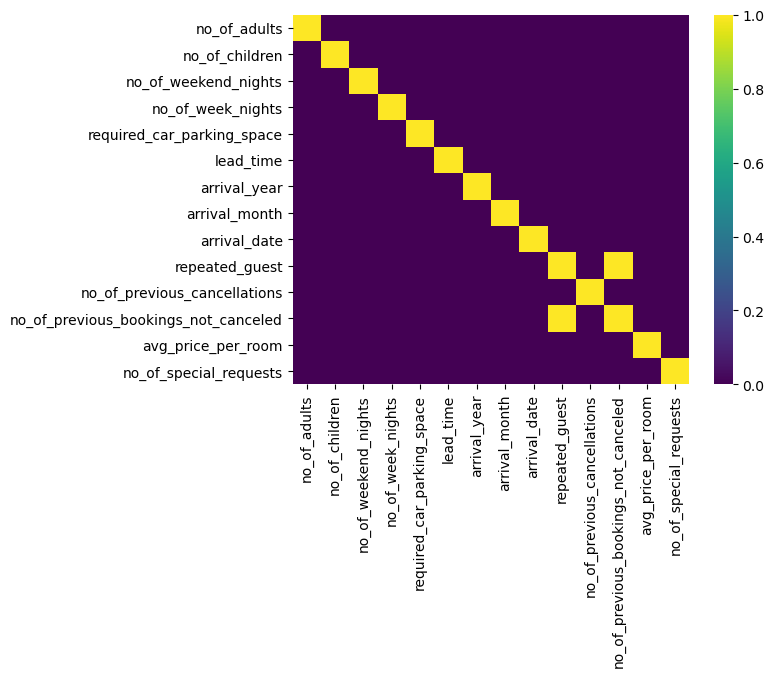

In [10]:
sns.heatmap(df.corr()>0.5, annot=False, cmap='viridis')

Canceled is much lower than Not_canceled, there will be imbalance dataset

<AxesSubplot: xlabel='booking_status', ylabel='count'>

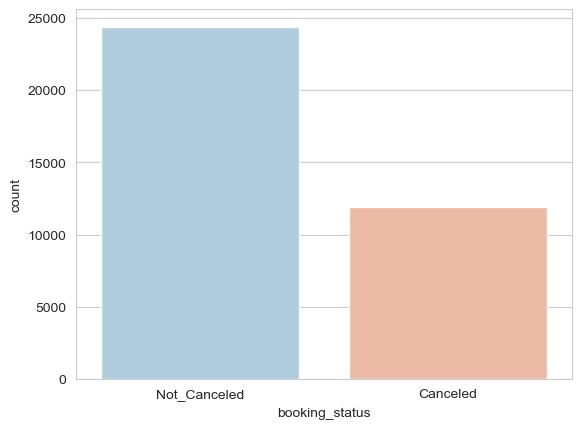

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='booking_status', data=df, palette='RdBu_r')

People with no family seems to cancel more often

<AxesSubplot: xlabel='booking_status', ylabel='count'>

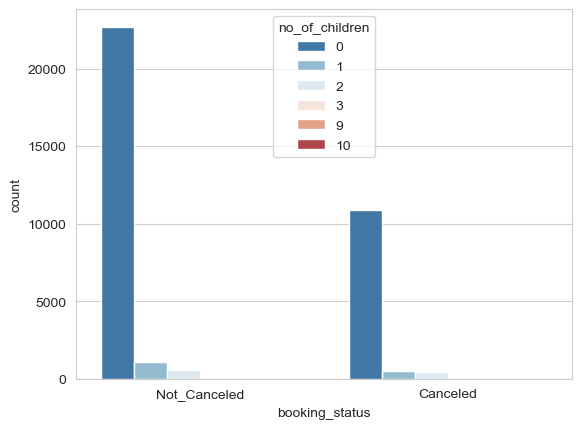

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='booking_status', hue='no_of_children', data=df, palette='RdBu_r')

<AxesSubplot: xlabel='booking_status', ylabel='count'>

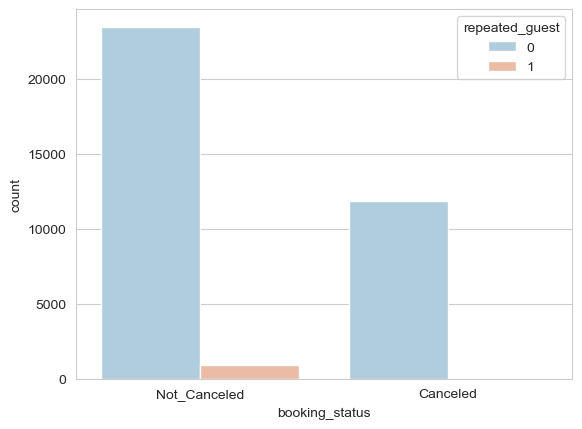

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='booking_status', hue='repeated_guest', data=df, palette='RdBu_r')

<AxesSubplot: xlabel='arrival_year', ylabel='count'>

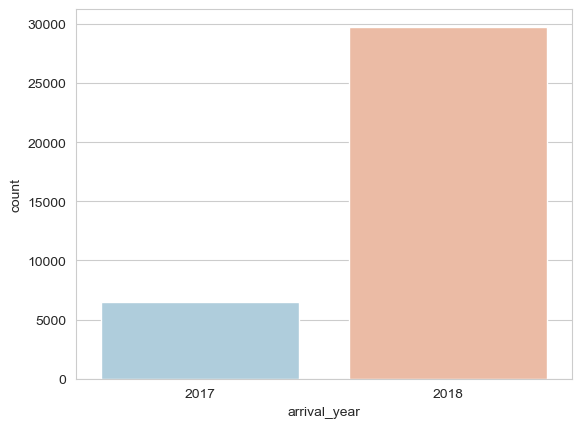

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='arrival_year', data=df, palette='RdBu_r')

Drop columns that are not meaningful

In [31]:
df_drop = df.drop(['Booking_ID', 'arrival_date'], axis=1)


## Feature engineering

In [35]:
type_of_meal = pd.get_dummies(df_drop['type_of_meal_plan'], drop_first=True)
room_type = pd.get_dummies(df_drop['room_type_reserved'], drop_first=True)
market_segment = pd.get_dummies(df_drop['market_segment_type'], drop_first=True)

df_drop.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], axis=1, inplace=True)
df_cleaned = pd.concat([df_drop, type_of_meal, room_type, market_segment], axis=1)

In [36]:
df_cleaned.booking_status = df_cleaned.booking_status.map({'Canceled': 1, 'Not_Canceled': 0})

In [42]:
df_cleaned.arrival_year = df_cleaned.arrival_year.map({2017: 0, 2018: 1})

## Training and Predicting

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_cleaned.drop('booking_status', axis=1),
                                                    df_cleaned['booking_status'], test_size=0.30,
                                                    random_state=101)

In [48]:
logmodel = LogisticRegression(solver='liblinear', max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [49]:
predictions = logmodel.predict(X_test)

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      7366
           1       0.74      0.63      0.68      3517

    accuracy                           0.81     10883
   macro avg       0.79      0.76      0.77     10883
weighted avg       0.80      0.81      0.80     10883



In [52]:
# TODO: Take percentage of cancelled/ total bookings as feature